In [1]:
# !pip install pandas matplotlib seaborn

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [110]:
df = pd.read_csv("../benchmarks/results.csv")
df.head()

,instance,type,algorithm,n_items,capacity,value,time_sec,memory_mb,status
0,f2_l-d_kp_20_878.kp,low,bnb,20,878.0,1024.0,0.0002,0.0096,OK
1,f2_l-d_kp_20_878.kp,low,fptas_05,20,878.0,1001.0,0.0028,0.0129,OK
2,f2_l-d_kp_20_878.kp,low,fptas_01,20,878.0,1019.0,0.0173,0.0628,OK
3,f2_l-d_kp_20_878.kp,low,fptas_001,20,878.0,1023.0,0.1462,0.2784,OK
4,f2_l-d_kp_20_878.kp,low,fptas_0001,20,878.0,1023.0,1.4186,1.8972,OK


In [111]:
numeric_cols = ["value", "time_sec", "memory_mb", "n_items", "capacity"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [112]:
df.head(6)

,instance,type,algorithm,n_items,capacity,value,time_sec,memory_mb,status
0,f2_l-d_kp_20_878.kp,low,bnb,20,878.0,1024.0,0.0002,0.0096,OK
1,f2_l-d_kp_20_878.kp,low,fptas_05,20,878.0,1001.0,0.0028,0.0129,OK
2,f2_l-d_kp_20_878.kp,low,fptas_01,20,878.0,1019.0,0.0173,0.0628,OK
3,f2_l-d_kp_20_878.kp,low,fptas_001,20,878.0,1023.0,0.1462,0.2784,OK
4,f2_l-d_kp_20_878.kp,low,fptas_0001,20,878.0,1023.0,1.4186,1.8972,OK
5,f7_l-d_kp_7_50.kp,low,bnb,7,50.0,107.0,0.0000,0.0028,OK


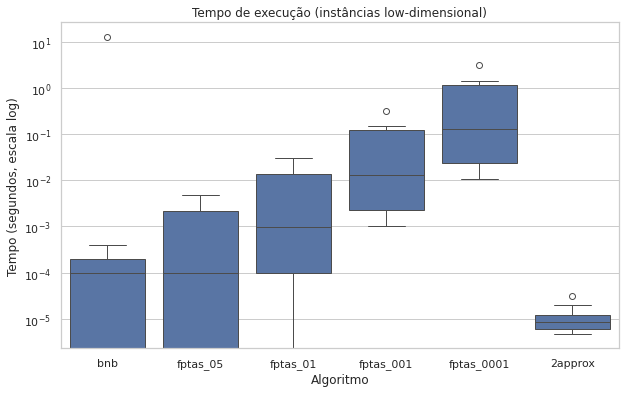

In [150]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df["type"] == "low"], x="algorithm", y="time_sec")
plt.yscale("log")
plt.title("Tempo de execução (instâncias low-dimensional)")
plt.xlabel("Algoritmo")
plt.ylabel("Tempo (segundos, escala log)")
plt.savefig("figs/tempo_low.png", dpi=300, bbox_inches="tight")
plt.show()

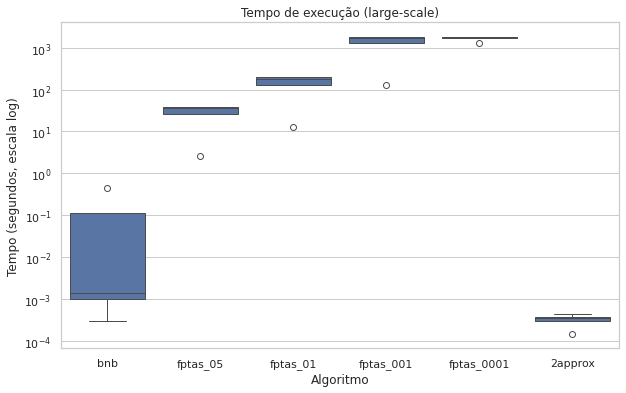

In [151]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df["type"] == "large"],
            x="algorithm", y="time_sec")
plt.yscale("log")
plt.title("Tempo de execução (large-scale)")
plt.ylabel("Tempo (segundos, escala log)")
plt.xlabel("Algoritmo")
plt.savefig("figs/tempo_large.png", dpi=300, bbox_inches="tight")
plt.show()

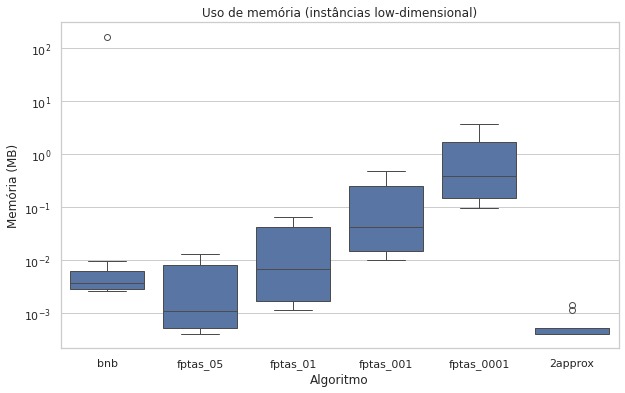

In [152]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df["type"] == "low"], x="algorithm", y="memory_mb")
plt.yscale("log")
plt.title("Uso de memória (instâncias low-dimensional)")
plt.xlabel("Algoritmo")
plt.ylabel("Memória (MB)")
plt.savefig("figs/memoria_low.png", dpi=300, bbox_inches="tight")
plt.show()

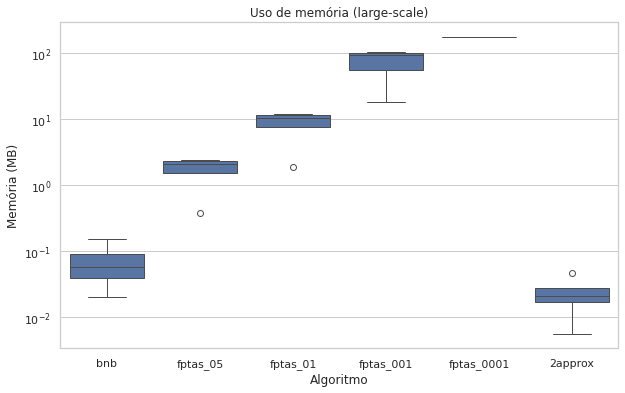

In [153]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df["type"] == "large"],
            x="algorithm", y="memory_mb")
plt.yscale("log")
plt.title("Uso de memória (large-scale)")
plt.ylabel("Memória (MB)")
plt.xlabel("Algoritmo")
plt.savefig("figs/memoria_large.png", dpi=300, bbox_inches="tight")
plt.show()

In [115]:
import os

opt_low = {}
path = "../instances/low-dimensional-optimum"

for filename in os.listdir(path):
  if filename.endswith(".kp") or "_" in filename:
    filepath = os.path.join(path, filename)
    with open(filepath) as f:
      try:
        val = round(float(f.readline().strip()), 4)
        instance = filename.strip()
        opt_low[instance] = val
      except:
        print(f"Erro lendo {filename}")

import pandas as pd
df_low_opt = pd.DataFrame(opt_low.items(), columns=["instance", "z"])

In [116]:
df_low_opt

,instance,z
0,f6_l-d_kp_10_60,52.0000
1,f2_l-d_kp_20_878,1024.0000
2,f9_l-d_kp_5_80,130.0000
3,f4_l-d_kp_4_11,23.0000
4,f10_l-d_kp_20_879,1025.0000
5,f5_l-d_kp_15_375,481.0694
6,f8_l-d_kp_23_10000,9767.0000
7,f3_l-d_kp_4_20,35.0000
8,f1_l-d_kp_10_269,295.0000
9,f7_l-d_kp_7_50,107.0000


In [117]:
opt_large = []

path = "../instances"
for file in os.listdir(path):
    if file.endswith("_info.csv"):
        instance = file.replace("_info.csv", "")
        info_path = os.path.join(path, file)

        with open(info_path) as f:
            for line in f:
                if line.lower().startswith("z"):
                    _, val = line.strip().split(',')
                    opt_large.append((instance, int(val)))
                    break

df_large_opt = pd.DataFrame(opt_large, columns=["instance", "z"])

In [118]:
df_large_opt

,instance,z
0,knapPI_1_500_1000_1,28857
1,knapPI_3_500_1000_1,7117
2,knapPI_2_500_1000_1,4566
3,knapPI_14_200_1000_1,5397


In [119]:
df_low_opt["instance"] = df_low_opt["instance"] + ".kp"
df_low_opt

,instance,z
0,f6_l-d_kp_10_60.kp,52.0000
1,f2_l-d_kp_20_878.kp,1024.0000
2,f9_l-d_kp_5_80.kp,130.0000
3,f4_l-d_kp_4_11.kp,23.0000
4,f10_l-d_kp_20_879.kp,1025.0000
5,f5_l-d_kp_15_375.kp,481.0694
6,f8_l-d_kp_23_10000.kp,9767.0000
7,f3_l-d_kp_4_20.kp,35.0000
8,f1_l-d_kp_10_269.kp,295.0000
9,f7_l-d_kp_7_50.kp,107.0000


In [120]:
df.head()

,instance,type,algorithm,n_items,capacity,value,time_sec,memory_mb,status
0,f2_l-d_kp_20_878.kp,low,bnb,20,878.0,1024.0,0.0002,0.0096,OK
1,f2_l-d_kp_20_878.kp,low,fptas_05,20,878.0,1001.0,0.0028,0.0129,OK
2,f2_l-d_kp_20_878.kp,low,fptas_01,20,878.0,1019.0,0.0173,0.0628,OK
3,f2_l-d_kp_20_878.kp,low,fptas_001,20,878.0,1023.0,0.1462,0.2784,OK
4,f2_l-d_kp_20_878.kp,low,fptas_0001,20,878.0,1023.0,1.4186,1.8972,OK


In [121]:
df_low = df[df["type"] == "low"].copy()
df_large = df[df["type"] == "large"].copy()

In [123]:
df_low.head()

,instance,type,algorithm,n_items,capacity,value,time_sec,memory_mb,status
0,f2_l-d_kp_20_878.kp,low,bnb,20,878.0,1024.0,0.0002,0.0096,OK
1,f2_l-d_kp_20_878.kp,low,fptas_05,20,878.0,1001.0,0.0028,0.0129,OK
2,f2_l-d_kp_20_878.kp,low,fptas_01,20,878.0,1019.0,0.0173,0.0628,OK
3,f2_l-d_kp_20_878.kp,low,fptas_001,20,878.0,1023.0,0.1462,0.2784,OK
4,f2_l-d_kp_20_878.kp,low,fptas_0001,20,878.0,1023.0,1.4186,1.8972,OK


In [124]:
df_large.head()

,instance,type,algorithm,n_items,capacity,value,time_sec,memory_mb,status
50,knapPI_1_500_1000_1,large,bnb,500,2543.0,28857.0,0.0015,0.0720,OK
51,knapPI_1_500_1000_1,large,fptas_05,500,2543.0,28832.0,38.2298,2.4476,OK
52,knapPI_1_500_1000_1,large,fptas_01,500,2543.0,28852.0,197.2901,12.2930,OK
53,knapPI_1_500_1000_1,large,fptas_001,500,2543.0,28856.0,1761.8079,106.6258,OK
54,knapPI_1_500_1000_1,large,fptas_0001,500,2543.0,NaN,1800.0035,NaN,TIMEOUT


In [125]:
df_low = df_low.merge(df_low_opt, on="instance", how="left")
df_large = df_large.merge(df_large_opt, on="instance", how="left")

In [128]:
df_low['value'] = round(df_low['value'], 4)

In [130]:
df_large['value'] = round(df_large['value'], 4)

In [132]:
df = pd.concat([df_low, df_large], ignore_index=True)

In [133]:
df

,instance,type,algorithm,n_items,capacity,value,time_sec,memory_mb,status,z
0,f2_l-d_kp_20_878.kp,low,bnb,20,878.0,1024.0,0.000200,0.0096,OK,1024.0
1,f2_l-d_kp_20_878.kp,low,fptas_05,20,878.0,1001.0,0.002800,0.0129,OK,1024.0
2,f2_l-d_kp_20_878.kp,low,fptas_01,20,878.0,1019.0,0.017300,0.0628,OK,1024.0
3,f2_l-d_kp_20_878.kp,low,fptas_001,20,878.0,1023.0,0.146200,0.2784,OK,1024.0
4,f2_l-d_kp_20_878.kp,low,fptas_0001,20,878.0,1023.0,1.418600,1.8972,OK,1024.0
...,...,...,...,...,...,...,...,...,...,...
79,knapPI_14_200_1000_1,large,fptas_0001,200,997.0,5396.0,1281.889700,177.1496,OK,5397.0
80,knapPI_1_500_1000_1,large,2approx,500,2543.0,28834.0,0.000423,0.0472,OK,28857.0
81,knapPI_3_500_1000_1,large,2approx,500,2517.0,7098.0,0.000362,0.0212,OK,7117.0
82,knapPI_2_500_1000_1,large,2approx,500,2543.0,4552.0,0.000354,0.0212,OK,4566.0


In [134]:
df["erro_relativo"] = ((df["z"] - df["value"]) / df["z"]) * 100
df.loc[df["z"] == 0, "erro_relativo"] = None
df["erro_relativo"] = df["erro_relativo"].round(4)


In [135]:
df

,instance,type,algorithm,n_items,capacity,value,time_sec,memory_mb,status,z,erro_relativo
0,f2_l-d_kp_20_878.kp,low,bnb,20,878.0,1024.0,0.000200,0.0096,OK,1024.0,0.0000
1,f2_l-d_kp_20_878.kp,low,fptas_05,20,878.0,1001.0,0.002800,0.0129,OK,1024.0,2.2461
2,f2_l-d_kp_20_878.kp,low,fptas_01,20,878.0,1019.0,0.017300,0.0628,OK,1024.0,0.4883
3,f2_l-d_kp_20_878.kp,low,fptas_001,20,878.0,1023.0,0.146200,0.2784,OK,1024.0,0.0977
4,f2_l-d_kp_20_878.kp,low,fptas_0001,20,878.0,1023.0,1.418600,1.8972,OK,1024.0,0.0977
...,...,...,...,...,...,...,...,...,...,...,...
79,knapPI_14_200_1000_1,large,fptas_0001,200,997.0,5396.0,1281.889700,177.1496,OK,5397.0,0.0185
80,knapPI_1_500_1000_1,large,2approx,500,2543.0,28834.0,0.000423,0.0472,OK,28857.0,0.0797
81,knapPI_3_500_1000_1,large,2approx,500,2517.0,7098.0,0.000362,0.0212,OK,7117.0,0.2670
82,knapPI_2_500_1000_1,large,2approx,500,2543.0,4552.0,0.000354,0.0212,OK,4566.0,0.3066


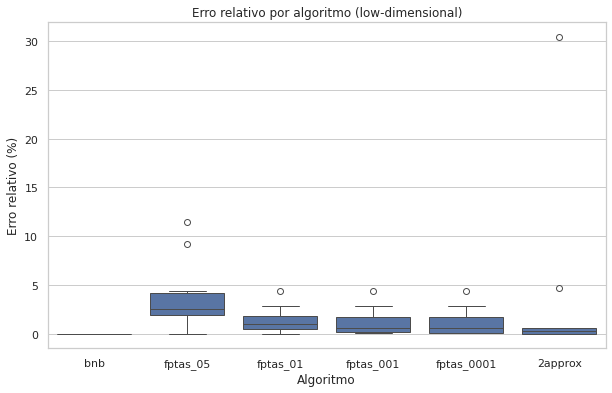

In [154]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[(df["type"] == "low")],
            x="algorithm", y="erro_relativo")
plt.title("Erro relativo por algoritmo (low-dimensional)")
plt.ylabel("Erro relativo (%)")
plt.xlabel("Algoritmo")
plt.savefig("figs/erro_relativo_low.png", dpi=300, bbox_inches="tight")
plt.show()

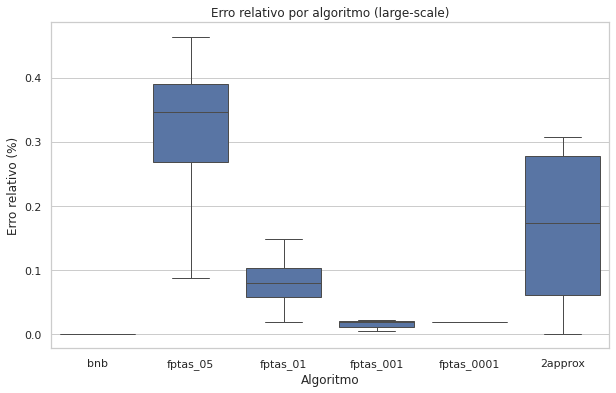

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[(df["type"] == "large")],
            x="algorithm", y="erro_relativo")
plt.title("Erro relativo por algoritmo (large-scale)")
plt.ylabel("Erro relativo (%)")
plt.xlabel("Algoritmo")
plt.savefig("figs/erro_relativo_large.png", dpi=300, bbox_inches="tight")
plt.show()

In [147]:
df[df["type"] == "large"].head()

,instance,type,algorithm,n_items,capacity,value,time_sec,memory_mb,status,z,erro_relativo
60,knapPI_1_500_1000_1,large,bnb,500,2543.0,28857.0,0.0015,0.0720,OK,28857.0,0.0000
61,knapPI_1_500_1000_1,large,fptas_05,500,2543.0,28832.0,38.2298,2.4476,OK,28857.0,0.0866
62,knapPI_1_500_1000_1,large,fptas_01,500,2543.0,28852.0,197.2901,12.2930,OK,28857.0,0.0173
63,knapPI_1_500_1000_1,large,fptas_001,500,2543.0,28856.0,1761.8079,106.6258,OK,28857.0,0.0035
64,knapPI_1_500_1000_1,large,fptas_0001,500,2543.0,NaN,1800.0035,NaN,TIMEOUT,28857.0,NaN


In [148]:
df[df["type"] == "low"].head()

,instance,type,algorithm,n_items,capacity,value,time_sec,memory_mb,status,z,erro_relativo
0,f2_l-d_kp_20_878.kp,low,bnb,20,878.0,1024.0,0.0002,0.0096,OK,1024.0,0.0000
1,f2_l-d_kp_20_878.kp,low,fptas_05,20,878.0,1001.0,0.0028,0.0129,OK,1024.0,2.2461
2,f2_l-d_kp_20_878.kp,low,fptas_01,20,878.0,1019.0,0.0173,0.0628,OK,1024.0,0.4883
3,f2_l-d_kp_20_878.kp,low,fptas_001,20,878.0,1023.0,0.1462,0.2784,OK,1024.0,0.0977
4,f2_l-d_kp_20_878.kp,low,fptas_0001,20,878.0,1023.0,1.4186,1.8972,OK,1024.0,0.0977


In [149]:
df[df["algorithm"] != "bnb"].groupby(["type", "algorithm"])["erro_relativo"].mean().round(2)

type   algorithm 
large  2approx       0.16
       fptas_0001    0.02
       fptas_001     0.01
       fptas_01      0.08
       fptas_05      0.31
low    2approx       3.68
       fptas_0001    1.14
       fptas_001     1.16
       fptas_01      1.38
       fptas_05      3.91
Name: erro_relativo, dtype: float64